In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
features_df = pd.read_csv('../raw_data/features_1000sample_400min_600cutoff.csv')
target_df = pd.read_csv('../raw_data/target_1000sample_400min_600cutoff.csv')

In [3]:
features_df.drop(columns = ['Unnamed: 0'], inplace = True)
target_df.drop(columns = ['Unnamed: 0'], inplace = True)
features_df.info()
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 534.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   party   7000 non-null   object
dtypes: object(1)
memory usage: 54.8+ KB


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.20, random_state=42, stratify=target_df)

In [5]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

/home/radu/.pyenv/versions/3.10.6/envs/polclassifier/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [6]:
model.score(X_test, y_test)

0.43785714285714283

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report

In [9]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         Con       0.38      0.28      0.32       276
         DUP       0.54      0.48      0.51       221
         Lab       0.22      0.24      0.23       183
      LibDem       0.23      0.32      0.27       145
  PlaidCymru       0.64      0.60      0.62       210
         SNP       0.48      0.55      0.52       175
         UUP       0.57      0.61      0.59       190

    accuracy                           0.44      1400
   macro avg       0.44      0.44      0.44      1400
weighted avg       0.45      0.44      0.44      1400



In [10]:
model.score(X_test, y_test)

0.43785714285714283

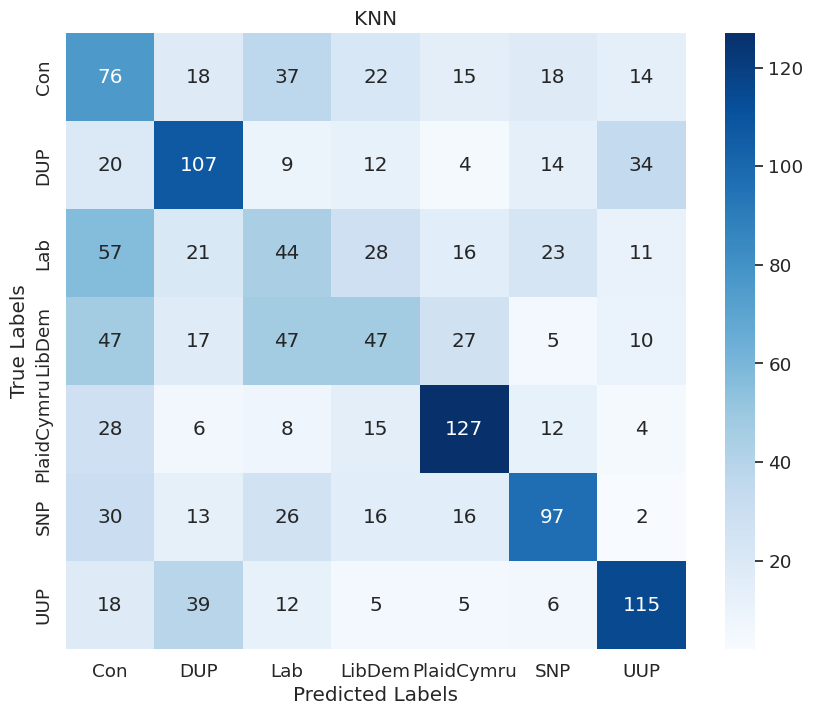

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the class names
class_names = target_df['party'].unique()

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN')
plt.show()